In [17]:
### python scripts to create seperate images ###
# import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from skimage import io # image i/o
from skimage import transform # image transformations
from PIL import Image
import cv2
def transPNG(srcImageName, dstImageName):
    im = cv2.imread(srcImageName)
    height, width, channels = im.shape
    new_im = np.ones((height, width, 4)) * 255
    new_im[:, :, :3] = im
    for i in range(height):
        for j in range(width):
            if new_im[i, j, :2].tolist() == [255.0, 255.0, 255.0]:
                new_im[i, j, :] = np.array([255.0, 255.0, 255.0, 0])
    cv2.imwrite(dstImageName, new_im)
def transformer(y1,y2,x1,x2,srcImageName, dstImageName):
    im = cv2.imread(srcImageName)
    height, width, channels = im.shape
    height = y2 - y1
    width = x2 - x1
    print(height,width)
    new_im = np.ones((height, width, 4)) * 255
    new_im[:, :, :3] = im[y1:y2, x1:x2, :3]
    for i in range(height):
        for j in range(width):
            if new_im[i, j, :3].tolist() == [255.0, 255.0, 255.0]:
                new_im[i, j, :] = np.array([255.0, 255.0, 255.0, 0])
    cv2.imwrite(dstImageName, new_im)
def png_trans(y1,y2,x1,x2,srcImageName, dstImageName):
    im = cv2.imread(srcImageName,cv2.IMREAD_UNCHANGED)
    height, width, channels = im.shape
    height = y2 - y1
    width = x2 - x1
    print(height,width)
    new_im = np.zeros((height, width, 4)) * 255
    new_im[:, :, :] = im[y1:y2, x1:x2, :]
    cv2.imwrite(dstImageName, new_im)

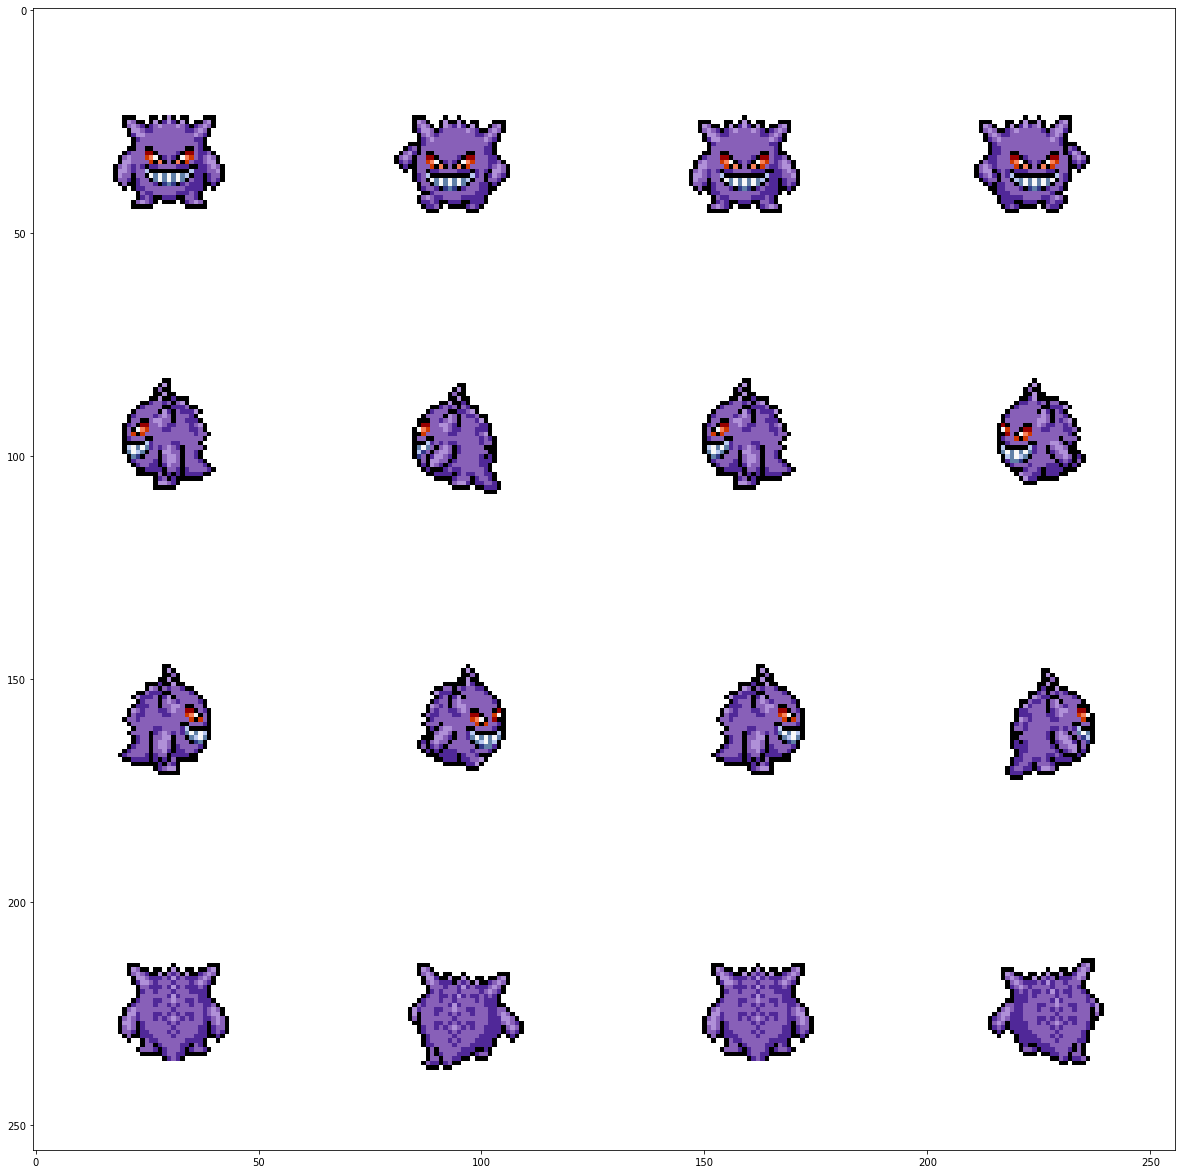

In [235]:
img_color = io.imread('gengar.png')
color_zoom_1 = img_color[:, :]
plt.imshow(color_zoom_1)

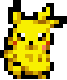

In [259]:
color_zoom_2 = img_color[29:48,16:32]
plt.figure(dpi =5)
plt.imshow(color_zoom_2)
plt.margins(0, 0)
plt.axis('off')
transformer(29,48,16,32,'pikachu.png','Pikachu_S_0.png')

20 17


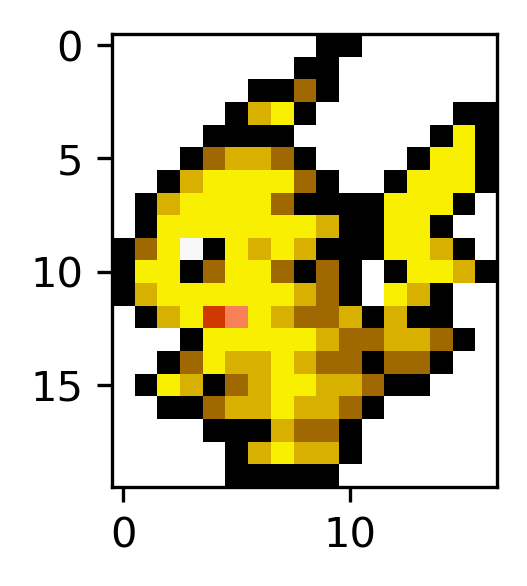

In [317]:
def test(y1,y2,x1,x2):
    color_zoom_2 = img_color[y1:y2,x1:x2]
    plt.figure(figsize = ((x2-x1)/10,(y2-y1)/10), dpi = 300)
    plt.imshow(color_zoom_2)
y = 50
test(26+y,46+y,16,33)
transformer(26+y,46+y,16,33,'pikachu.png','Pikachu_A_0.png')
# y*=2
# test(24+y,44+y,13,30)
# transformer(24+y,44+y,13,30,'pikachu.png','Pikachu_D_0.png')
# y*=3
# test(22+y,42+y,16,35)
# transformer(22+y,42+y,16,35,'pikachu.png','Pikachu_W_0.png')

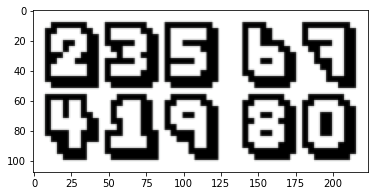

In [9]:
img_color = io.imread('Number_font.png')
color_zoom_1 = img_color[:, :]
plt.imshow(color_zoom_1)

46 40


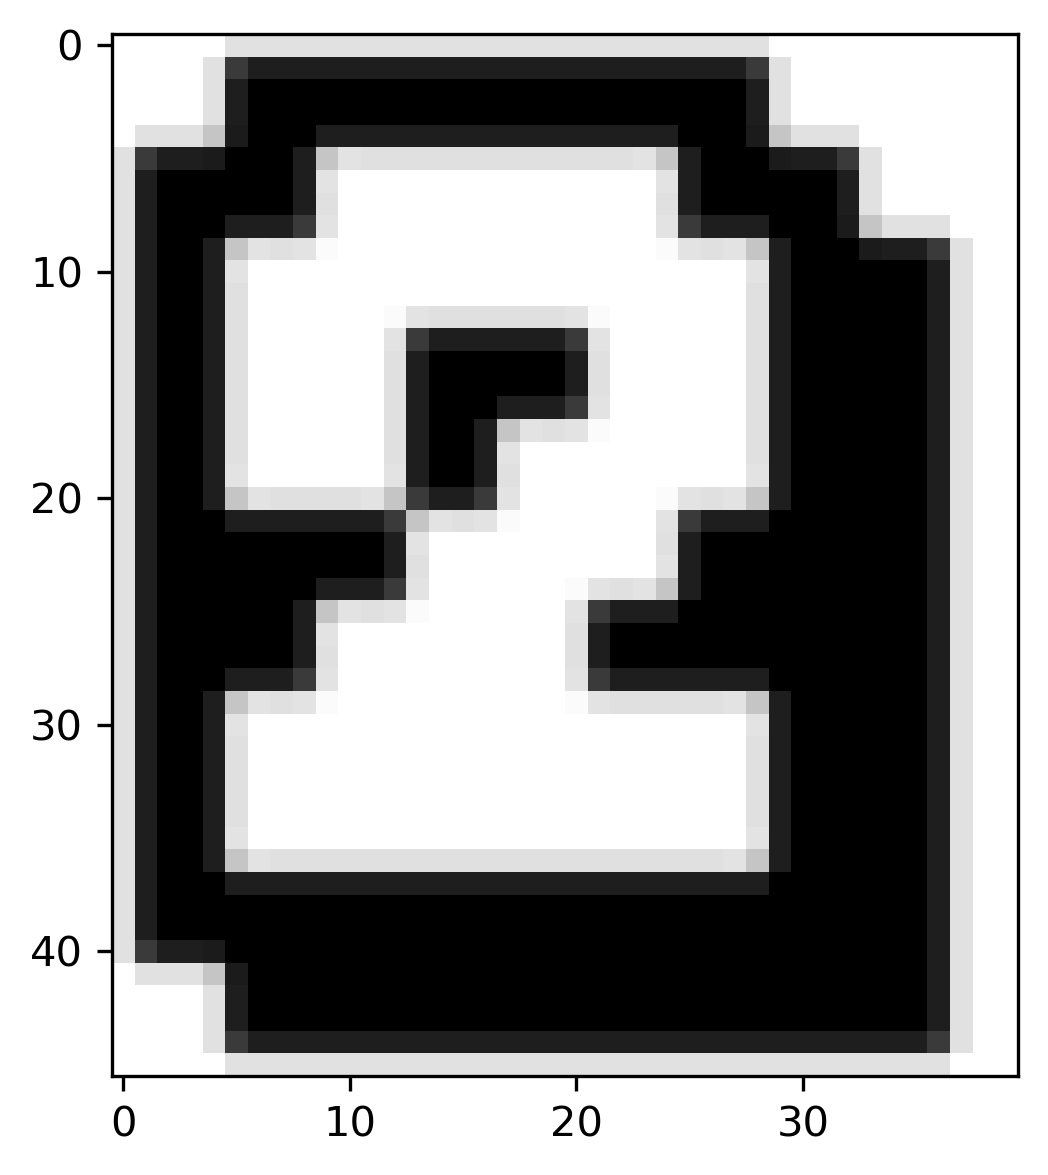

In [18]:
def test(y1,y2,x1,x2):
    color_zoom_2 = img_color[y1:y2,x1:x2]
    plt.figure(figsize = ((x2-x1)/10,(y2-y1)/10), dpi = 300)
    plt.imshow(color_zoom_2)
l = 40
h = 46
x = 7
y = 7
test(y,y+h,x,x+l)
png_trans(y,y+h,x,x+l,'Number_font.png','2.png')

46 40


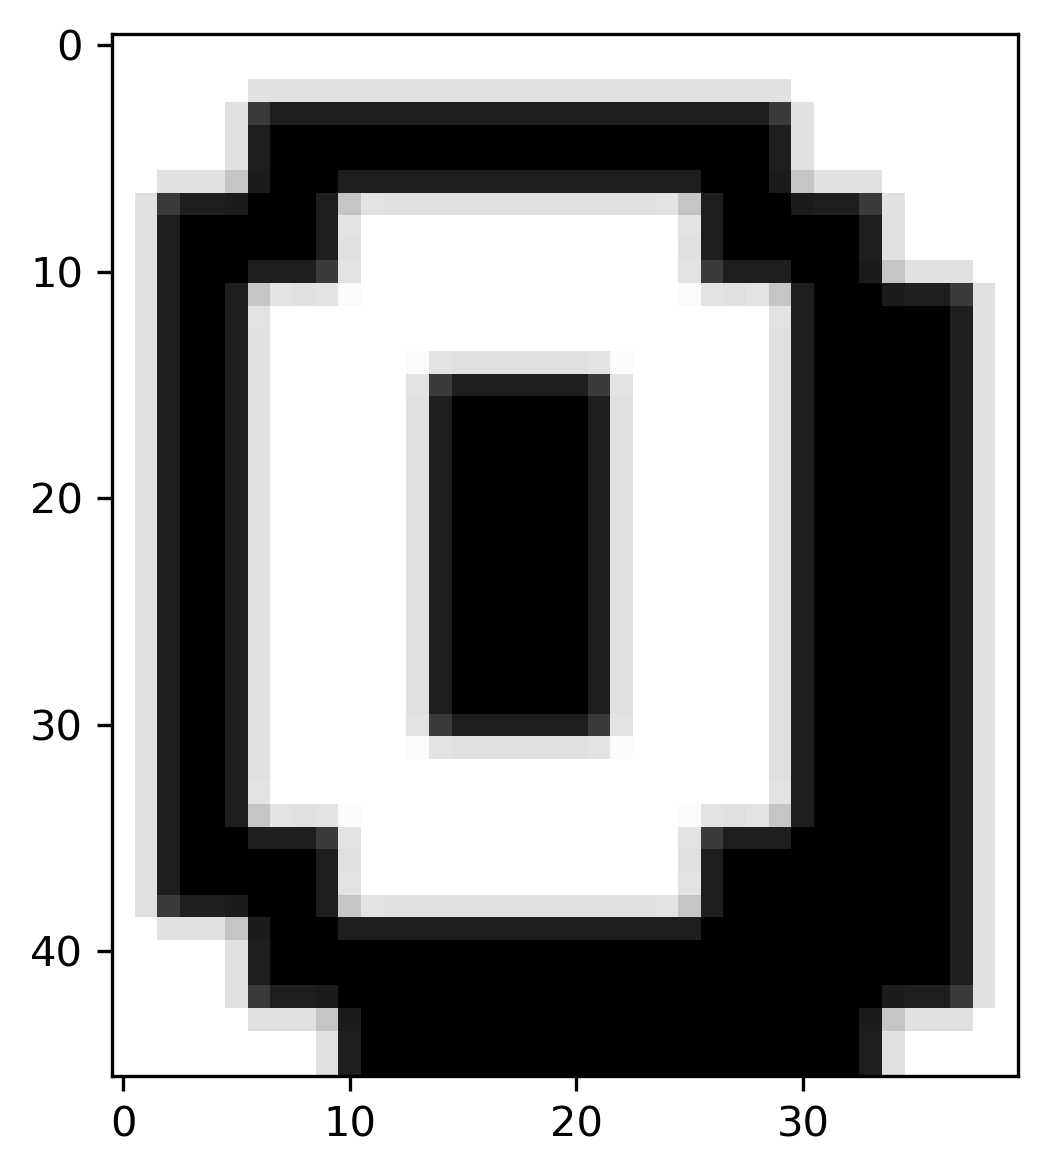

In [38]:
l = 40
h = 46
x = 138+l
y = 7+h
test(y,y+h,x,x+l)
png_trans(y,y+h,x,x+l,'Number_font.png','0.png')

In [9]:
def Simple_Gen(y1,y2,x1,x2):
    im = cv2.imread('background_elements.png',cv2.IMREAD_UNCHANGED)
    height, width, channels = 320, 240, 4
    new_im = np.ones((width, height, 4)) * 255
    h_s = y2 - y1
    w_s = x2 - x1
    stamp = im[x1:x2,y1:y2,:3]
    for i in range(width):
        for j in range(height):
            new_im[i,j,:3] = stamp[i%w_s, j%h_s,:3]
    cv2.imwrite('Simple_background.png', new_im) 
    
# def transformer(y1,y2,x1,x2,srcImageName, dstImageName):
#     im = cv2.imread(srcImageName)
#     height, width, channels = im.shape
#     height = y2 - y1
#     width = x2 - x1
#     print(height,width)
#     new_im = np.ones((height, width, 4)) * 255
#     new_im[:, :, :3] = im[y1:y2, x1:x2, :3]
#     for i in range(height):
#         for j in range(width):
#             if new_im[i, j, :3].tolist() == [255.0, 255.0, 255.0]:
#                 new_im[i, j, :] = np.array([255.0, 255.0, 255.0, 0])
#     cv2.imwrite(dstImageName, new_im)   

In [105]:
Simple_Gen(0,32,0,20)

In [10]:
def Add_Element(x1,x2,y1,y2,x,y,dstImageName):
    im = cv2.imread('background_elements.png',cv2.IMREAD_UNCHANGED)
    stamp = im[y1:y2,x1:x2]
    new_im = cv2.imread(dstImageName,cv2.IMREAD_UNCHANGED)
    for i in range(y2-y1):
        for j in range(x2-x1):
            if y+i < 240 and x+j < 320:
                if stamp[i,j,3] == 0:
                    new_im[y+i,x+j] = new_im[y+i,x+j]
                else:
                    new_im[y+i,x+j] = stamp[i,j]
    cv2.imwrite(dstImageName, new_im)

In [13]:
# Grass:                  0,32,0,20                         32*20 pixel
# Floor Brick:            32,32+48,304,304+48               48*48 pixel √
# Huge HOUSE:             0,80,1280,1280+80,128,100         80*80 pixel
# Banner:                 80,128,256,256+48                 48*48 pixel
# Flowers:                48,80,0,32                        32*32 pixel 
# single vertical banner: 80,88,305,305+32                  8*32 pixel
# Grass_1                 48,48+32,864,864+16               32*16 pixel
# brGrass                 0,32,2594,2610                    32*16 pixel
# vertical banner:        96, 96+16, 290, 290+16            16*16 pixel √
# sand mountain:          86, 86+35, 2620, 2620 +35         35*35 pixel √
# stone banner:           14,34,92,88+24                    20*24 pixel √
# stone platform:         0,48,64,64+48                     48*48 pixel √
# stone scatter:          0,16,2528,2544                    16*16 pixel √
# statue opf fighting:    0,64,3440,3480                    64*40 pixel √
Simple_Gen(0,32,2594,2610)
init_x = 16
init_y = 24
for i in range(6):
    for j in range(4):
        Add_Element(32,32+48,304,304+48,init_x + 48*i, init_y + 48*j,'Simple_background.png')
Add_Element(96, 96+16, 290, 290+16 ,0,56,'Simple_background.png')
num = 1
while (16*(num-1) < 320):
    Add_Element(96, 96+16, 290, 290+16 ,16*num,56,'Simple_background.png')
    num += 1
num = 0
while (35*(num-1) < 320):
    Add_Element(86, 86+35, 2620, 2620 +35,35*num,240-35,'Simple_background.png')
    num += 1
num = 0
while (20*(num-1) < 320):
    Add_Element(14,34,92,88+24 ,20*num,0,'Simple_background.png')
    num += 1
Add_Element(0,48,66,64+48,136,7,'Simple_background.png')
# Add_Element(0,16,2528,2544,0,40,'Simple_background.png')
# Add_Element(0,16,2528,2544,320-16,40,'Simple_background.png')
# Add_Element(0,64,3440,3480,16,16,'Simple_background.png')
# Add_Element(0,64,3440,3480,240,16,'Simple_background.png')
# Add_Character(0,64,0,64,72,10,'Simple_background.png')
# Add_Element(96, 96+16, 290, 290+16 ,208+16,56,'Simple_background.png')
# Add_Element(96, 96+16, 290, 290+16 ,208+16*2,56,'Simple_background.png')
# Add_Element(96, 96+16, 290, 290+16 ,208+16*3,56,'Simple_background.png')
# for i in range(10):
#     Add_Element(48,80,0,32,np.random.randint(0,320),np.random.randint(0,240),'Simple_background.png')
#     Add_Element(48,48+32,864,864+16,np.random.randint(0,320),np.random.randint(0,240),'Simple_background.png')

In [5]:
def Add_Character(x1,x2,y1,y2,x,y,dstImageName):
    im = cv2.imread('LOGO_SMALL.png',cv2.IMREAD_UNCHANGED)
    stamp = im
    y1 = 0
    y2 = stamp.shape[0]
    x1 = 0
    x2 = stamp.shape[1]
    new_im = cv2.imread(dstImageName,cv2.IMREAD_UNCHANGED)
    for i in range(y2-y1):
        for j in range(x2-x1):
            if y+i < 240 and x+j < 320:
                if stamp[i,j,3] == 0:
                    new_im[y+i,x+j] = new_im[y+i,x+j]
                else:
                    new_im[y+i,x+j] = stamp[i,j]
    cv2.imwrite(dstImageName, new_im)

In [11]:
def Seperate_Element(x1,x2,y1,y2,x,y,dstImageName):
    im = cv2.imread('background_elements.png',cv2.IMREAD_UNCHANGED)
    stamp = im[y1:y2,x1:x2]
    new_im = np.zeros((stamp.shape))
    for i in range(y2-y1):
        for j in range(x2-x1):
            if y+i < 240 and x+j < 320:
                if stamp[i,j,3] == 0:
                    new_im[y+i,x+j] = new_im[y+i,x+j]
                else:
                    new_im[y+i,x+j] = stamp[i,j]
    cv2.imwrite(dstImageName, new_im)

In [157]:
Seperate_Element(32,32+48,304,304+48,0,0,'1.png')

In [19]:
# Floor Brick:            32,32+48,304,304+48               48*48 pixel √
# vertical banner:        96, 96+16, 290, 290+16            16*16 pixel √
# sand mountain:          86, 86+35, 2620, 2620 +35         35*35 pixel √
# stone banner:           14,34,92,88+24                    20*24 pixel √
# stone platform:         0,48,64,64+48                     48*48 pixel √
# stone scatter:          0,16,2528,2544                    16*16 pixel √
# statue opf fighting:    0,64,3440,3480                    64*40 pixel √
def Seperate_Lightening(x1,x2,y1,y2,x,y,dstImageName):
    im = cv2.imread('Pikachu_Ref.png',cv2.IMREAD_UNCHANGED)
    stamp = im[y1:y2,x1:x2]
    new_im = np.zeros((stamp.shape))
    for i in range(y2-y1):
        for j in range(x2-x1):
            if y+i < 240 and x+j < 320:
#                 if stamp[i,j,3] == 0:
#                     new_im[y+i,x+j] = new_im[y+i,x+j]
#                 else:
#                     new_im[y+i,x+j] = stamp[i,j]
                new_im[y+i,x+j] = stamp[i,j]
    cv2.imwrite(dstImageName, new_im)
Seperate_Lightening(520, 552, 54, 274, 0, 0,'Lightening.png')

In [30]:
transPNG('Lightening.png','Lightening.png')